In [111]:
import pandas as pd
import numpy as np
from plotnine import *
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from yellowbrick.classifier import ClassificationReport
from sklearn.model_selection import train_test_split

from pygam import LogisticGAM

In [89]:
df = pd.read_csv("Covid Data.csv")
df

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,13,2,1,9999-99-99,97,2,40,97,2,...,2,2,2,2,2,2,2,2,7,97
1048571,1,13,2,2,9999-99-99,2,2,51,97,2,...,2,2,1,2,2,2,2,2,7,2
1048572,2,13,2,1,9999-99-99,97,2,55,97,2,...,2,2,2,2,2,2,2,2,7,97
1048573,2,13,2,1,9999-99-99,97,2,28,97,2,...,2,2,2,2,2,2,2,2,7,97


In [90]:
df.columns

Index(['USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'DATE_DIED', 'INTUBED',
       'PNEUMONIA', 'AGE', 'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR',
       'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY',
       'RENAL_CHRONIC', 'TOBACCO', 'CLASIFFICATION_FINAL', 'ICU'],
      dtype='object')

In [91]:
pd.isnull(df).any()

USMER                   False
MEDICAL_UNIT            False
SEX                     False
PATIENT_TYPE            False
DATE_DIED               False
INTUBED                 False
PNEUMONIA               False
AGE                     False
PREGNANT                False
DIABETES                False
COPD                    False
ASTHMA                  False
INMSUPR                 False
HIPERTENSION            False
OTHER_DISEASE           False
CARDIOVASCULAR          False
OBESITY                 False
RENAL_CHRONIC           False
TOBACCO                 False
CLASIFFICATION_FINAL    False
ICU                     False
dtype: bool

In [92]:
class EDA:
    def set_df(self, df):
        self.dataframe = df
        
    def is_null(self):
        for col in self.dataframe.columns:
            print('特征{}共有{}个水平'.format(col, self.dataframe[col].nunique()))
    
    def examine_null_column(self):
        self.null_columns = [col for col in self.dataframe.columns if len(self.dataframe[col].unique()) > 2 and len(self.dataframe[col].unique()) <= 4]
        
        for col in self.null_columns:
            p = (ggplot(self.dataframe, aes(col))
                + geom_bar(stat='count', width=0.8, color='black', size=0.25, fill='#FC4E07', alpha=1)
                + labs(y='数量')
                + theme(text=element_text(family='SimHei', size=12, face='bold')))
            
            print(p)
    
    def clean_null(self):
        self.dataframe.drop('INTUBED', axis=1, inplace=True)
        self.dataframe = self.dataframe[self.dataframe['PNEUMONIA'] < 97]
        self.dataframe.drop('PREGNANT', axis=1, inplace=True)
        self.dataframe = self.dataframe[self.dataframe['DIABETES'] < 97]
        self.dataframe = self.dataframe[self.dataframe['COPD'] < 97]
        self.dataframe = self.dataframe[self.dataframe['ASTHMA'] < 97]
        self.dataframe = self.dataframe[self.dataframe['INMSUPR'] < 97]
        self.dataframe = self.dataframe[self.dataframe['HIPERTENSION'] < 97]
        self.dataframe = self.dataframe[self.dataframe['OTHER_DISEASE'] < 97]
        self.dataframe = self.dataframe[self.dataframe['CARDIOVASCULAR'] < 97]
        self.dataframe = self.dataframe[self.dataframe['OBESITY'] < 97]
        self.dataframe = self.dataframe[self.dataframe['RENAL_CHRONIC'] < 97]
        self.dataframe = self.dataframe[self.dataframe['TOBACCO'] < 97]
        self.dataframe.drop('ICU', axis=1, inplace=True)
        
    def create_death(self):
        self.dataframe["DEATH"] = [1 if row=='9999-99-99' else 0 for row in self.dataframe["DATE_DIED"]]
        self.dataframe.drop('DATE_DIED', axis=1, inplace=True)
        
    def corr_plt(self):
        plt.figure(figsize=(18, 15))
        correlation = self.dataframe.corr()
        sns.heatmap(correlation, annot=True, fmt=".2f")

In [93]:
eda = EDA()
eda.set_df(df)

In [94]:
eda.is_null()

特征USMER共有2个水平
特征MEDICAL_UNIT共有13个水平
特征SEX共有2个水平
特征PATIENT_TYPE共有2个水平
特征DATE_DIED共有401个水平
特征INTUBED共有4个水平
特征PNEUMONIA共有3个水平
特征AGE共有121个水平
特征PREGNANT共有4个水平
特征DIABETES共有3个水平
特征COPD共有3个水平
特征ASTHMA共有3个水平
特征INMSUPR共有3个水平
特征HIPERTENSION共有3个水平
特征OTHER_DISEASE共有3个水平
特征CARDIOVASCULAR共有3个水平
特征OBESITY共有3个水平
特征RENAL_CHRONIC共有3个水平
特征TOBACCO共有3个水平
特征CLASIFFICATION_FINAL共有7个水平
特征ICU共有4个水平


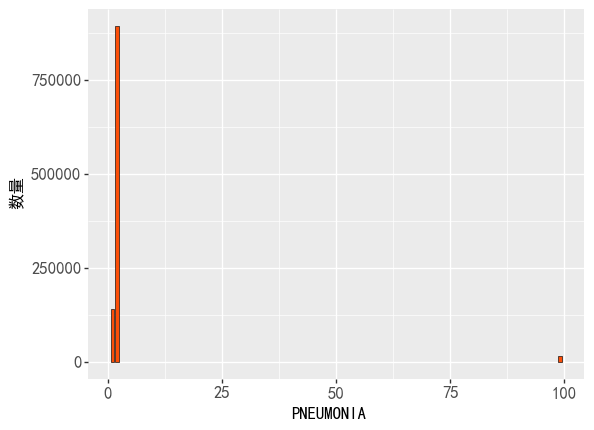

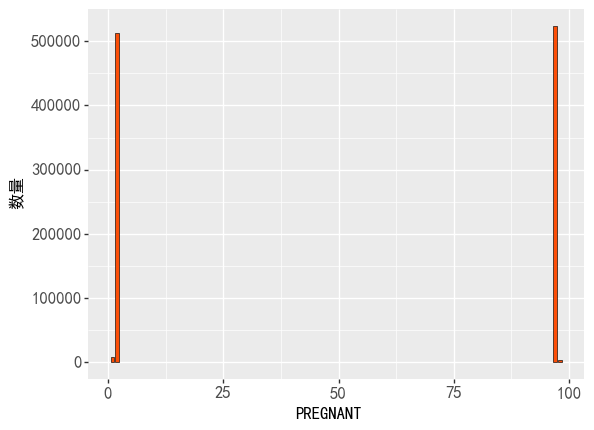

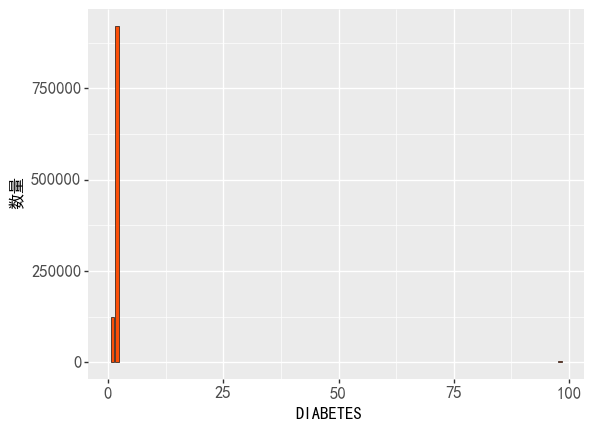

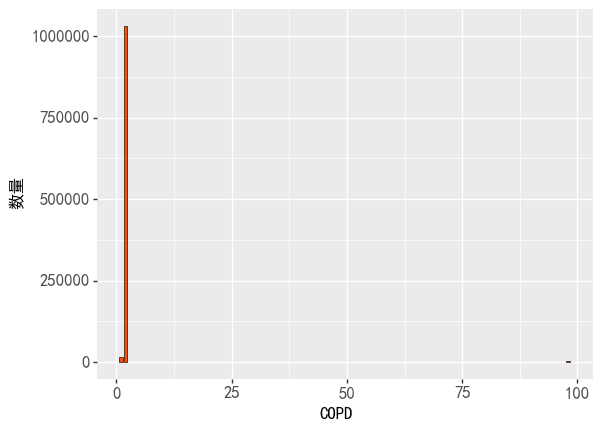

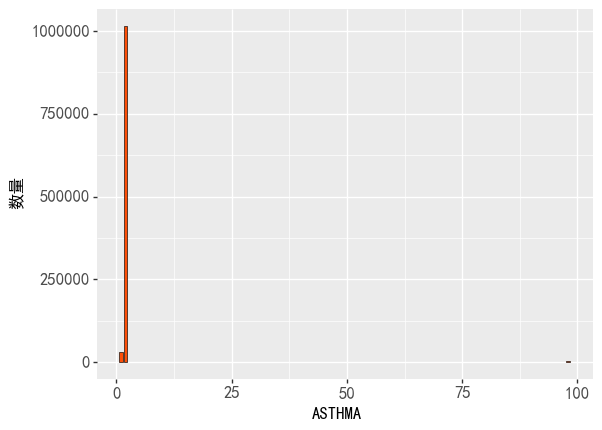

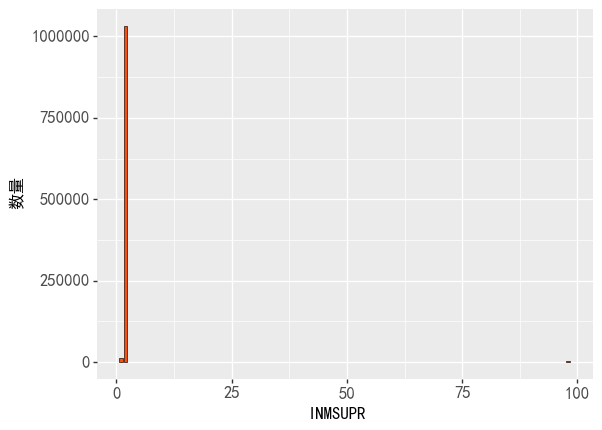

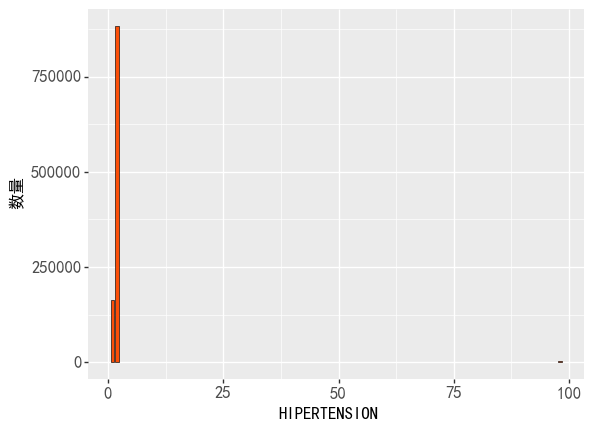

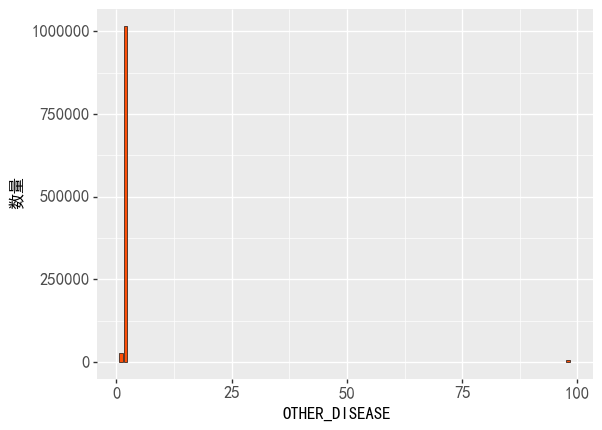

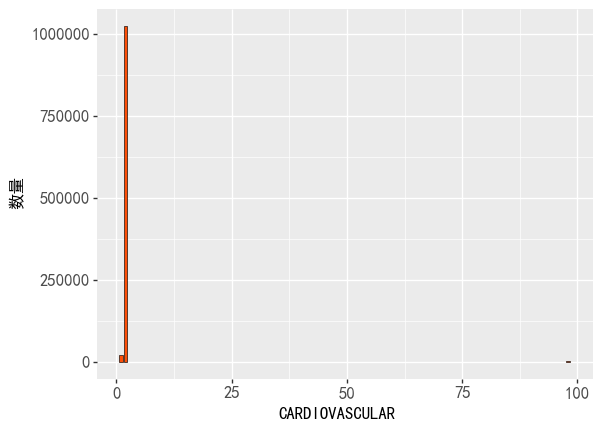

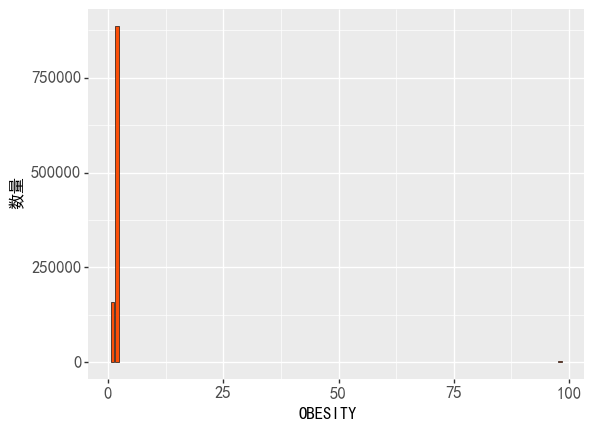

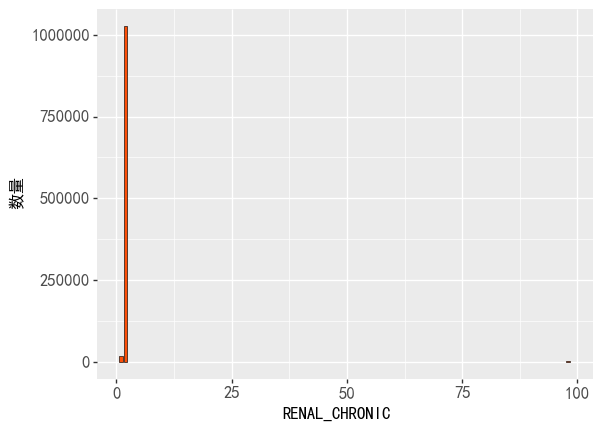

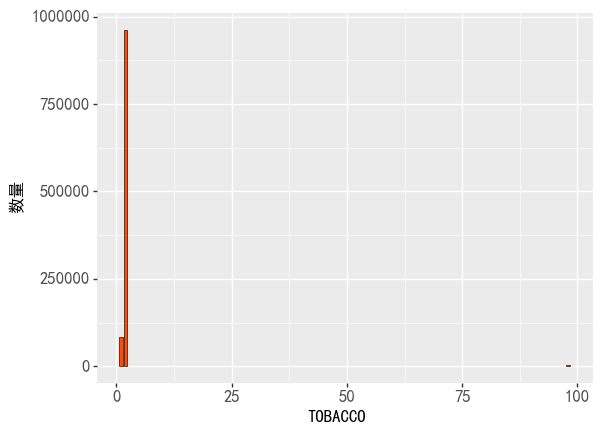

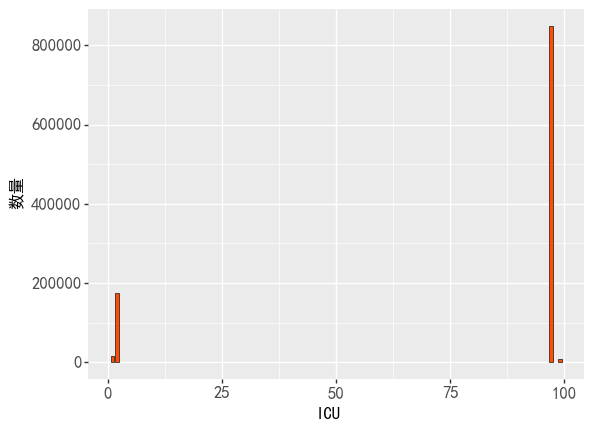

In [86]:
eda.examine_null_column()

In [87]:
eda.null_columns

['PNEUMONIA',
 'PREGNANT',
 'DIABETES',
 'COPD',
 'ASTHMA',
 'INMSUPR',
 'HIPERTENSION',
 'OTHER_DISEASE',
 'CARDIOVASCULAR',
 'OBESITY',
 'RENAL_CHRONIC',
 'TOBACCO',
 'ICU']

In [95]:
eda.clean_null()

C:\Users\23971\AppData\Local\Temp/ipykernel_13688/1019955616.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [96]:
eda.dataframe

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,PNEUMONIA,AGE,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL
0,2,1,1,1,03/05/2020,1,65,2,2,2,2,1,2,2,2,2,2,3
1,2,1,2,1,03/06/2020,1,72,2,2,2,2,1,2,2,1,1,2,5
2,2,1,2,2,09/06/2020,2,55,1,2,2,2,2,2,2,2,2,2,3
3,2,1,1,1,12/06/2020,2,53,2,2,2,2,2,2,2,2,2,2,7
4,2,1,2,1,21/06/2020,2,68,1,2,2,2,1,2,2,2,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,13,2,1,9999-99-99,2,40,2,2,2,2,2,2,2,2,2,2,7
1048571,1,13,2,2,9999-99-99,2,51,2,2,2,2,1,2,2,2,2,2,7
1048572,2,13,2,1,9999-99-99,2,55,2,2,2,2,2,2,2,2,2,2,7
1048573,2,13,2,1,9999-99-99,2,28,2,2,2,2,2,2,2,2,2,2,7


In [97]:
eda.is_null()

特征USMER共有2个水平
特征MEDICAL_UNIT共有13个水平
特征SEX共有2个水平
特征PATIENT_TYPE共有2个水平
特征DATE_DIED共有395个水平
特征PNEUMONIA共有2个水平
特征AGE共有121个水平
特征DIABETES共有2个水平
特征COPD共有2个水平
特征ASTHMA共有2个水平
特征INMSUPR共有2个水平
特征HIPERTENSION共有2个水平
特征OTHER_DISEASE共有2个水平
特征CARDIOVASCULAR共有2个水平
特征OBESITY共有2个水平
特征RENAL_CHRONIC共有2个水平
特征TOBACCO共有2个水平
特征CLASIFFICATION_FINAL共有7个水平


In [98]:
eda.create_death()

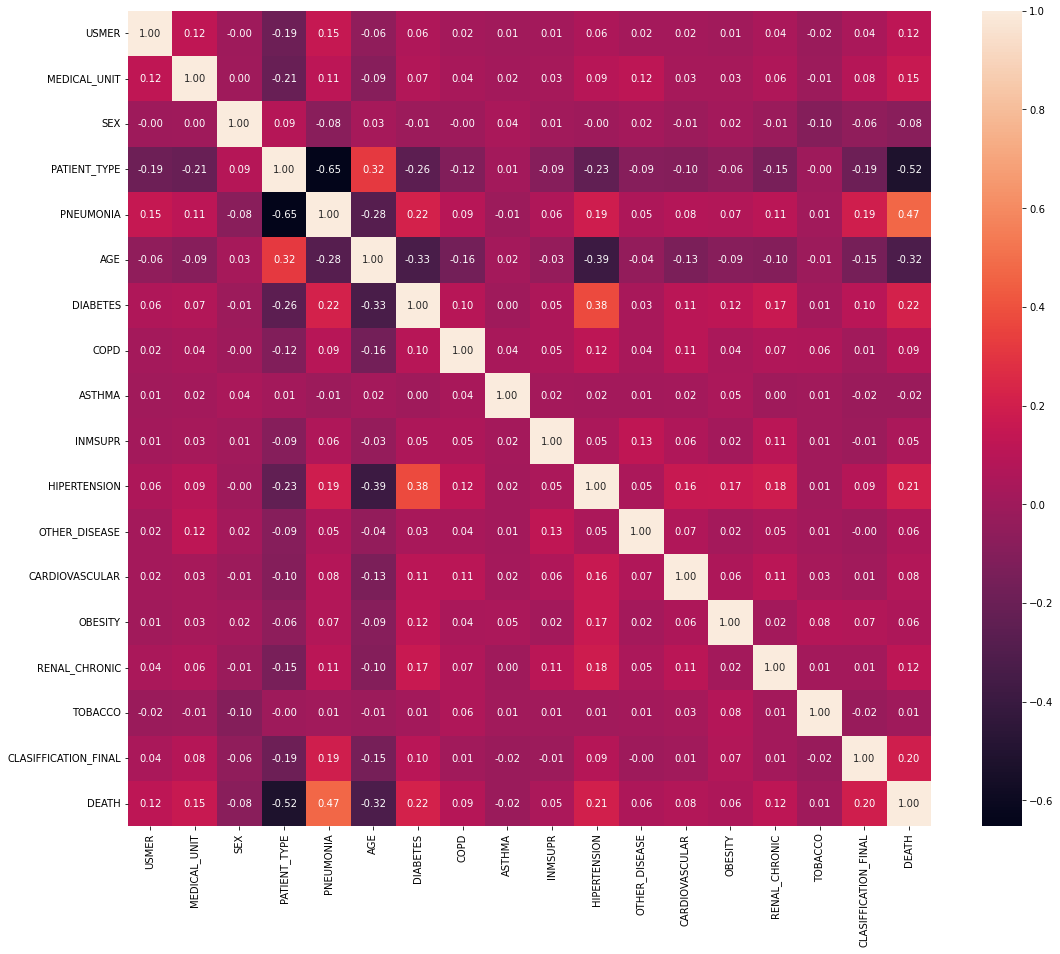

In [99]:
eda.corr_plt()

In [155]:
mydataframe = eda.dataframe
mydataframe.to_csv('mydataframe.csv', index=False)

In [103]:
X = eda.dataframe.drop("DEATH", axis=1)
Y = eda.dataframe["DEATH"]

In [104]:
X_train, X_valid, Y_train, Y_valid = train_test_split(X, Y, train_size=0.7, random_state=12)

In [105]:
print("X_train", X_train.shape)
print("X_valid", X_valid.shape)
print("Y_train", Y_train.shape)
print("Y_valid", Y_valid.shape)

X_train (717606, 17)
X_valid (307546, 17)
Y_train (717606,)
Y_valid (307546,)


In [107]:
random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train, Y_train)
prediction_random = random_forest_model.predict(X_valid)
random_forest_score = accuracy_score(Y_valid, prediction_random)*100
print(f"The accuracy of the Random Forest Model on the validation data is {round(random_forest_score, 2)}%")

The accuracy of the Random Forest Model on the validation data is 93.38%


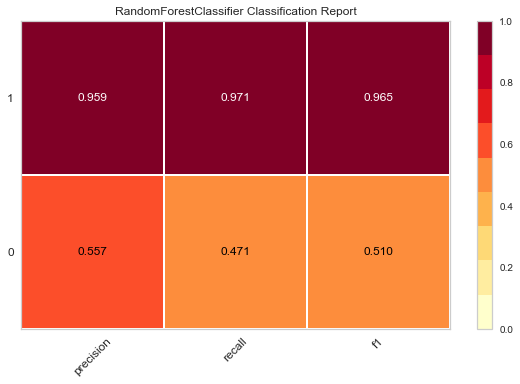

<AxesSubplot:title={'center':'RandomForestClassifier Classification Report'}>

In [109]:
random_forest_model = RandomForestClassifier()
random_forest_model = ClassificationReport(random_forest_model, support=False)
random_forest_model.fit(X_train, Y_train)
random_forest_model.score(X_valid, Y_valid)
random_forest_model.show()

In [114]:
gam = LogisticGAM().fit(X_train, Y_train)

In [118]:
prediction_gam = gam.predict(X_valid)
gam_score = accuracy_score(Y_valid, prediction_gam)*100
print(f"The accuracy of the GAM on the validation data is {round(gam_score, 2)}%")

The accuracy of the GAM on the validation data is 94.0%


In [153]:
len(Y_valid[(prediction_gam==0) & (Y_valid == 0)]) / len(Y_valid[Y_valid==0])

0.47120908483633933

In [154]:
print(len(Y_valid[(prediction_gam==0) & (Y_valid == 0)]))
print(len(Y_valid[Y_valid==0]))

10581
22455


In [119]:
gam.summary()

LogisticGAM                                                                                               
=============================================== ==========================================================
Distribution:                      BinomialDist Effective DoF:                                     46.2406
Link Function:                        LogitLink Log Likelihood:                                -91267.5128
Number of Samples:                       717606 AIC:                                           182627.5068
                                                AICc:                                          182627.5131
                                                UBRE:                                               2.2545
                                                Scale:                                                 1.0
                                                Pseudo R-Squared:                                   0.5125
Feature Function                  Lam

C:\Users\23971\AppData\Local\Temp/ipykernel_13688/3358381670.py:1: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 



ValueError: cannot create grid for intercept term

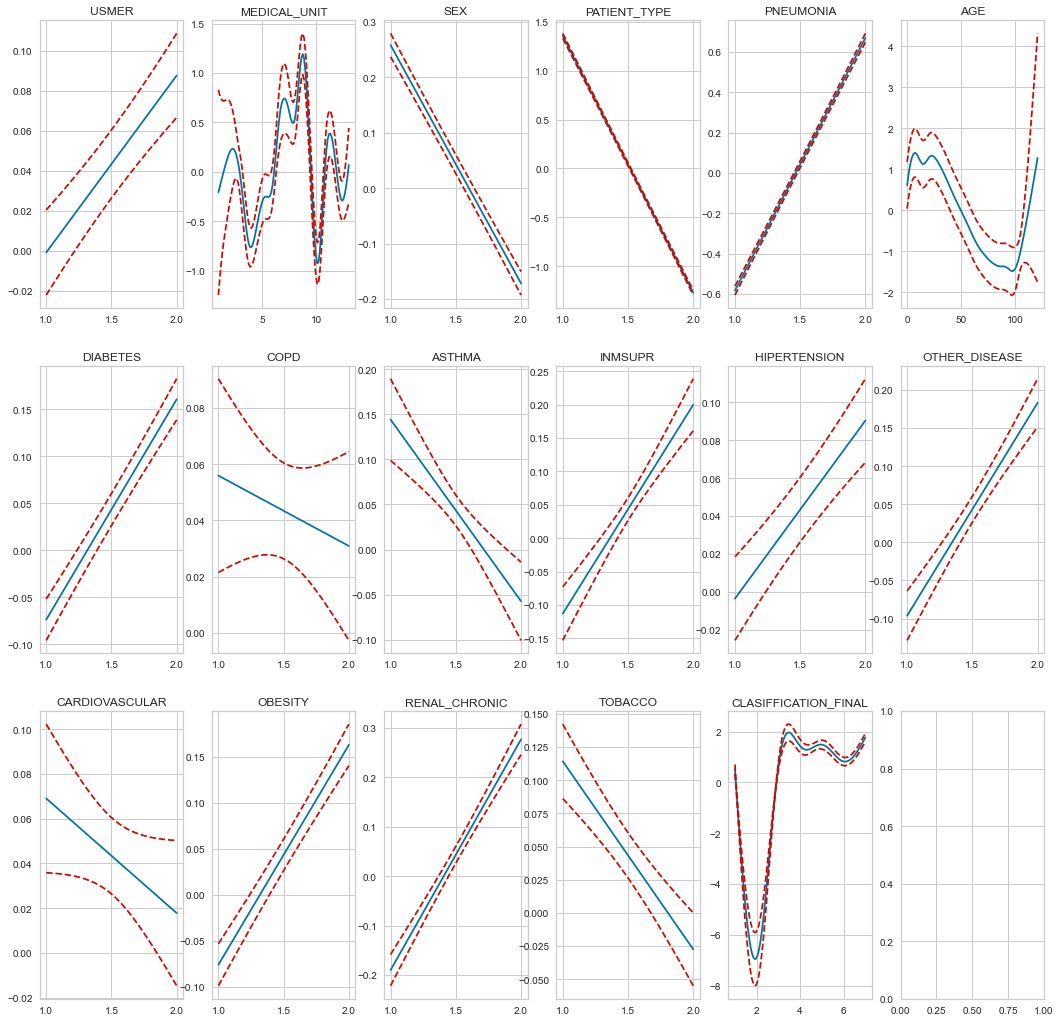

In [140]:
plt.rcParams['figure.figsize'] = (18, 18)
fig, axs = plt.subplots(3, 6)

axs = axs.ravel()
 
for i, ax in enumerate(axs):
    XX = gam.generate_X_grid(term=i)
    ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX))
    ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX,   width=.95)[1], c='r', ls='--')
    ax.set_title(X_train.columns[i])
plt.show()